# Classical Stats anomaly detection 
- Tietjen-Moore hypothesis( data ~ normal)
- Boxplot
- Z-score
- histogram
- summary stats
# ML methods
- Find other data do other tests
- Paper algo outlines alot of work
- AE FF keras check
- AE LSTM keras?
- AE CNN keras? 
- VAE LSTM check 
- DBSCAN scikit check
- IF scratch check
- LOF scikit check

In [1]:
!pip install scikit-posthocs

In [151]:
from scikit_posthocs import outliers_grubbs

In [160]:
resultval2=outliers_tietjen(valuevsgrowth.values,1,hypo=False,alpha=0.01)

In [161]:
check(valuevsgrowth,resultval2)

array([181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191])

In [178]:
from scikit_posthocs import outliers_tietjen
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
returnsant=pd.read_csv('returnsant.csv')
valuevsgrowth= returnsant['Factor - Value vs Growth']
rates=returnsant['Factor - Interest Rates']
resultval=outliers_tietjen(valuevsgrowth.values,1,hypo=False,alpha=0.05)
resultrate=outliers_tietjen(rates.values,1,hypo=False,alpha=0.05)
resulthedge=outliers_tietjen( hedge.values,1,hypo=False,alpha=0.05)
def check(v1,v2):
    index=[]
    for f,v in enumerate(v1[0:192]):
        if v!=v2[f]:
            index.append(f)
    index=np.array(index)       
    return index

In [149]:
check(valuevsgrowth,resultval)


array([181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191])

In [57]:
check(rates,resultrate)

array([ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191])

In [179]:
check(hedge,resulthedge)

array([], dtype=float64)

<AxesSubplot:>

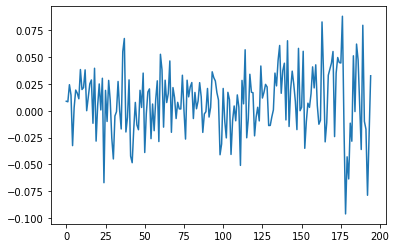

In [163]:
hedge=returnsant['Hedge Fund']
hedge.plot()

<AxesSubplot:>

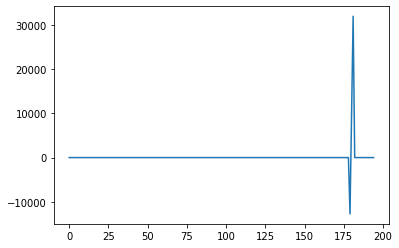

In [41]:
valuevsgrowth.plot()



<AxesSubplot:>

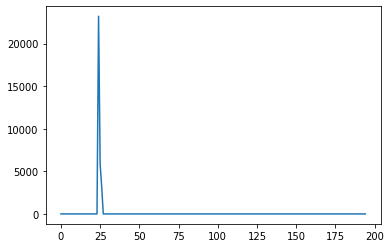

In [58]:
rates.plot()

<AxesSubplot:>

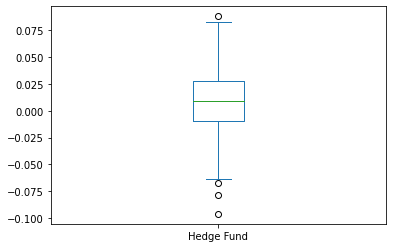

In [181]:
hedge.plot(kind='box')

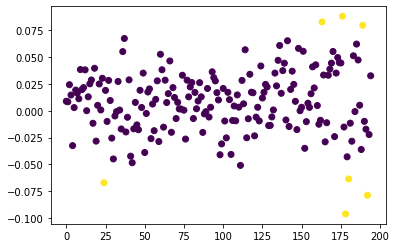

In [214]:
boxindiceshedge=hedge[(hedge.values < -0.063) | (hedge.values > 0.075)].index
boxindiceshedge
boxcolorhedge=np.zeros(195)
boxcolorhedge[boxindiceshedge]=1
plt.scatter(hedge.index,hedge.values, c=boxcolorhedge)

<AxesSubplot:>

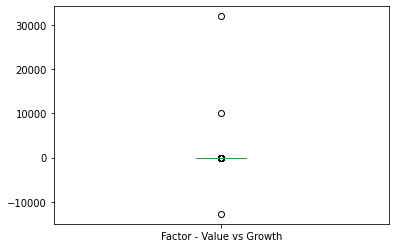

In [216]:
valuevsgrowth.plot(kind='box')

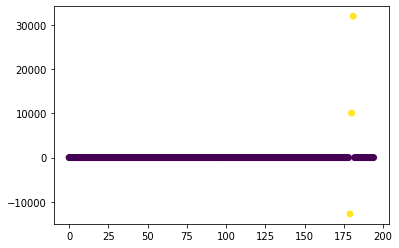

In [217]:
boxindicesval=valuevsgrowth[(valuevsgrowth.values < -9000) | (valuevsgrowth.values > 9000)].index
boxindicesval
boxcolorval=np.zeros(195)
boxcolorval[boxindicesval]=1
plt.scatter(valuevsgrowth.index,valuevsgrowth.values, c=boxcolorval)

<AxesSubplot:>

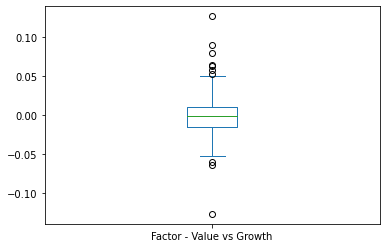

In [220]:
newval=valuevsgrowth.drop(boxindicesval,axis=0)
newval.plot(kind='box')

<AxesSubplot:>

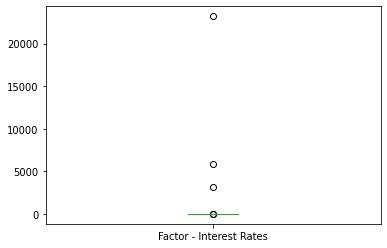

In [60]:
rates.plot(kind='box')

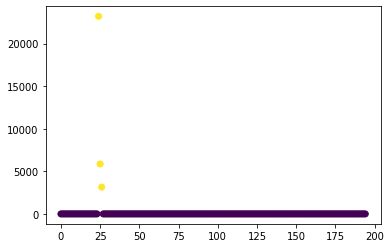

In [221]:
boxindicesrat=rates[rates.values >1000].index
boxindicesrat
boxcolorrat=np.zeros(195)
boxcolorrat[boxindicesrat]=1
plt.scatter(rates.index,rates.values, c=boxcolorrat)

<AxesSubplot:>

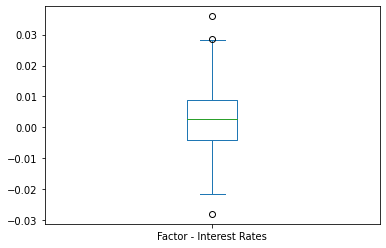

In [222]:
newrat=rates.drop(boxindicesrat,axis=0)
newrat.plot(kind='box')

<AxesSubplot:ylabel='Density'>

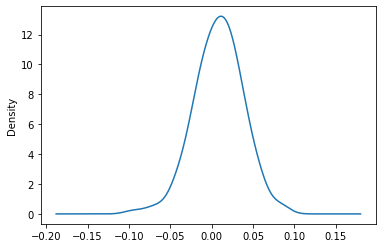

In [182]:
hedge.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

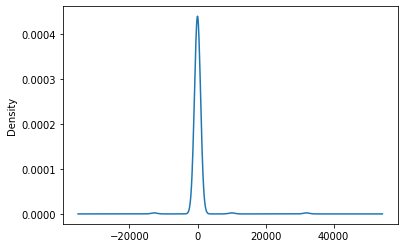

In [183]:
valuevsgrowth.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

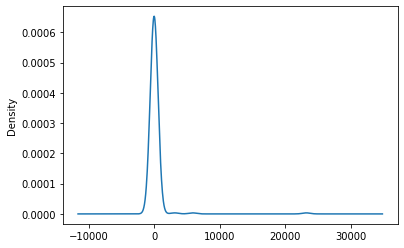

In [184]:
rates.plot(kind='kde')

In [185]:
from scipy import stats
shapirop=stats.shapiro(valuevsgrowth.values)[1]
if shapirop > 0.05:
    print('Reiduals are normal with p value {}'.format(shapirop))
else:
    print('n')


n


In [188]:
shapirop=stats.shapiro(rates.values)[1]
if shapirop > 0.05:
    print('Reiduals are normal with p value {}'.format(shapirop))
else:
    print('n')



n


In [62]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(valuevsgrowth.values.reshape(-1,1))
distances, indices = nbrs.kneighbors(valuevsgrowth.values.reshape(-1,1))

In [69]:
neigh2 = NearestNeighbors(n_neighbors=2)
nbrs2 = neigh.fit(rates.values.reshape(-1,1))
distances2, indices2 = nbrs.kneighbors(rates.values.reshape(-1,1))

In [165]:
neigh3 = NearestNeighbors(n_neighbors=2)
nbrs3 = neigh.fit(hedge.values.reshape(-1,1))
distances3, indices3 = nbrs.kneighbors(hedge.values.reshape(-1,1))

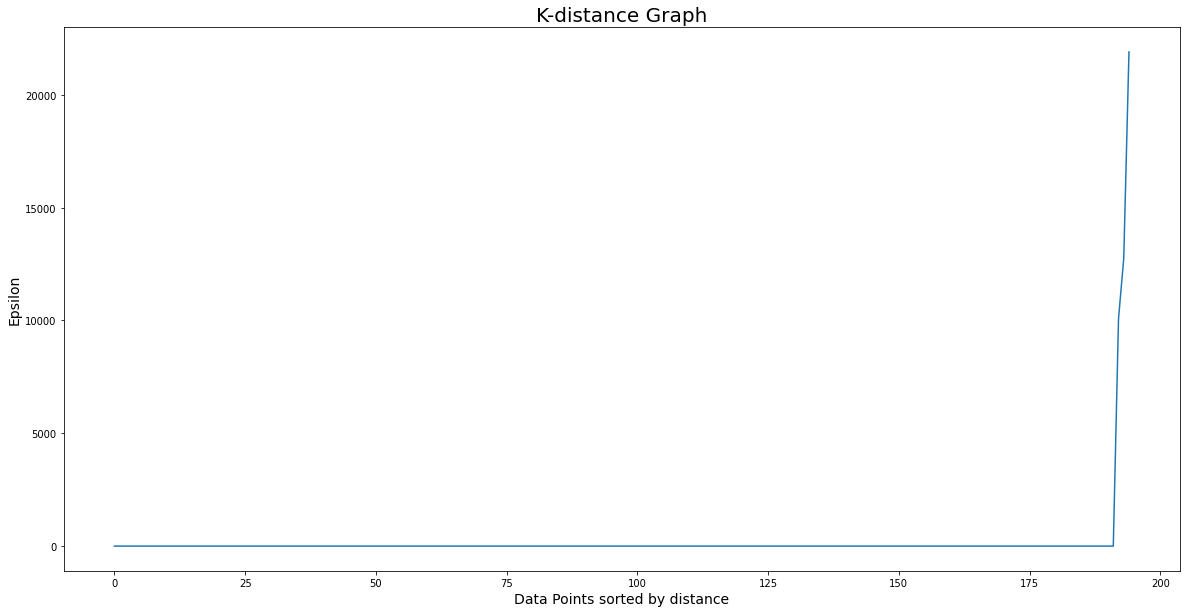

In [63]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

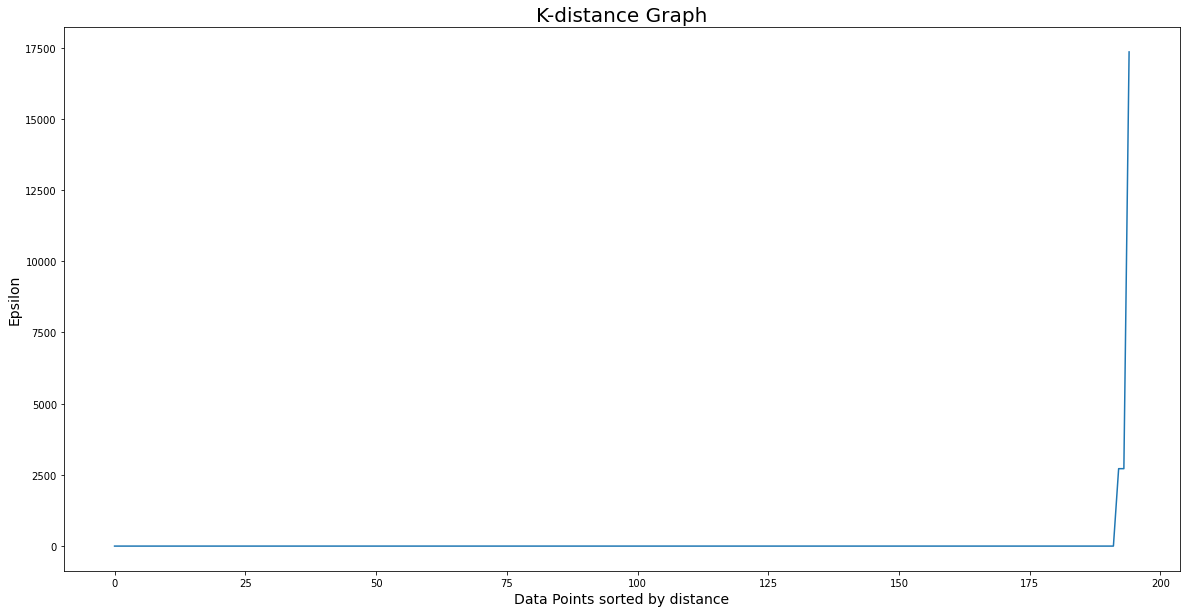

In [71]:
distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances2)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

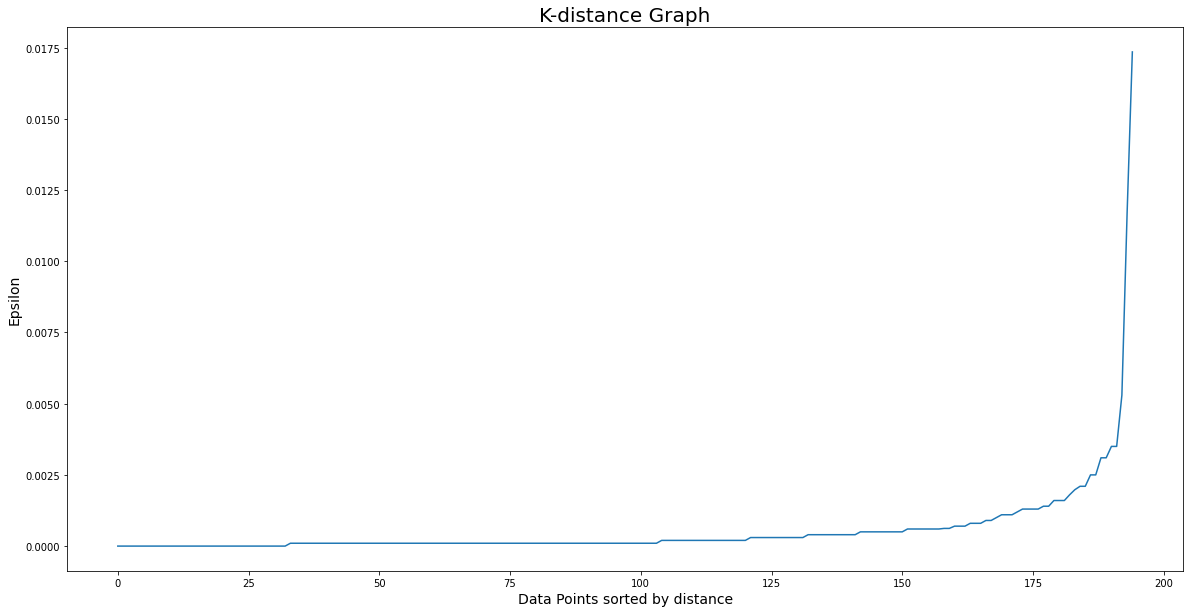

In [166]:
distances3 = np.sort(distances3, axis=0)
distances3 = distances3[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances3)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

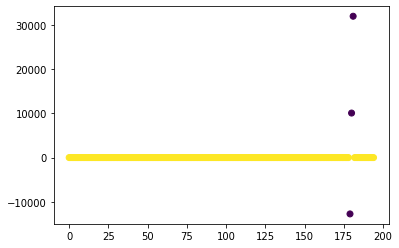

In [75]:
e

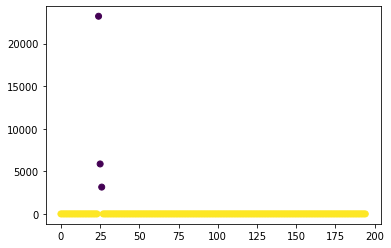

In [74]:
dbscan=DBSCAN()
model = DBSCAN(eps = 1000, min_samples = 10).fit(rates.values.reshape(-1,1))
colors = model.labels_
plt.scatter(rates.index, rates.values, c = colors)

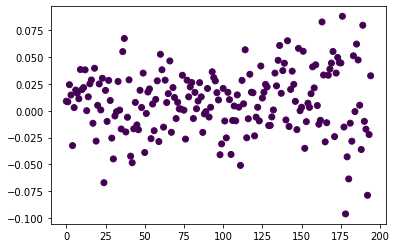

In [167]:
dbscan=DBSCAN()
model = DBSCAN(eps = 1000, min_samples = 10).fit(hedge.values.reshape(-1,1))
colors = model.labels_
plt.scatter(hedge.index, hedge.values, c = colors)

In [79]:
from sklearn.neighbors import LocalOutlierFactor
localclf = LocalOutlierFactor(n_neighbors=2)
resultval=localclf.fit_predict(valuevsgrowth.values.reshape(-1,1))
result

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1])

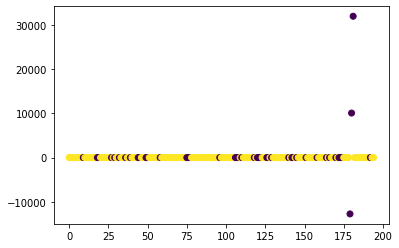

In [82]:
plt.scatter(valuevsgrowth.index, valuevsgrowth.values, c = resultval)

In [84]:
localclf2 = LocalOutlierFactor(n_neighbors=2)
result2=localclf2.fit_predict(rates.values.reshape(-1,1))
result2

array([-1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1])

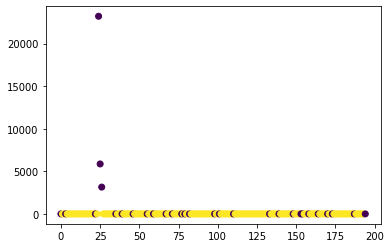

In [85]:
plt.scatter(rates.index, rates.values, c = result2)

In [168]:
localclf3 = LocalOutlierFactor(n_neighbors=2)
result3=localclf3.fit_predict(rates.values.reshape(-1,1))
result3

array([-1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1])

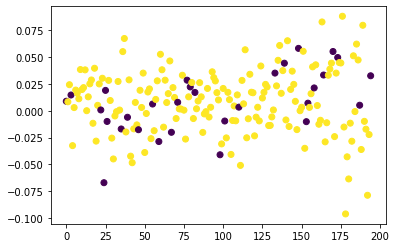

In [169]:
plt.scatter(hedge.index, hedge.values, c = result3)

In [170]:

import numpy as np
import pandas as pd
# Follows algo from https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf

def c(size):
    if size > 2:
        return 2 * (np.log(size-1)+0.5772156649) - 2*(size-1)/size
    if size == 2:
        return 1
    return 0


class LeafNode:
    def __init__(self, size, data):
        self.size = size
        self.data = data


class DecisionNode:
    def __init__(self, left, right, splitAtt, splitVal):
        self.left = left
        self.right = right
        self.splitAtt = splitAtt
        self.splitVal = splitVal


class IsolationTree:
    def __init__(self, height, height_limit):
        self.height = height
        self.height_limit = height_limit

    def fit(self, X: np.ndarray, improved=False):
        """
        Given a 2D matrix of observations, create an isolation tree. Set field
        self.root to the root of that tree and return it.
        If you are working on an improved algorithm, check parameter "improved"
        and switch to your new functionality else fall back on your original code.
        """
        if improved:
            self.improved_fit(X)
        else:
            if self.height >= self.height_limit or X.shape[0] <= 2:
                self.root = LeafNode(X.shape[0], X)
                return self.root

            # Choose Random Split Attributes and Value
            num_features = X.shape[1]
            splitAtt = np.random.randint(0, num_features)
            splitVal = np.random.uniform(min(X[:, splitAtt]), max(X[:, splitAtt]))

            X_left = X[X[:, splitAtt] < splitVal]
            X_right = X[X[:, splitAtt] >= splitVal]

            left = IsolationTree(self.height + 1, self.height_limit)
            right = IsolationTree(self.height + 1, self.height_limit)
            left.fit(X_left)
            right.fit(X_right)
            self.root = DecisionNode(left.root, right.root, splitAtt, splitVal)
            self.n_nodes = self.count_nodes(self.root)
            return self.root

    def improved_fit(self, X: np.ndarray):
        if self.height >= self.height_limit or X.shape[0] <= 2:
            self.root = LeafNode(X.shape[0], X)
            return self.root

        # Choose Best (The Most unbalanced) Random Split Attributes and Value
        num_features = X.shape[1]
        ratio_imp = 0.5 # Intialize the samples ratio after split as 0.5

        for i in range(num_features):
            splitAtt = i
            for _ in range(10):
                splitVal = np.random.uniform(min(X[:, splitAtt]), max(X[:, splitAtt]))
                X_left = X[X[:, splitAtt] < splitVal]
                X_right = X[X[:, splitAtt] >= splitVal]
                ratio = min(X_left.shape[0] / (X_left.shape[0] + X_right.shape[0]),
                            X_right.shape[0] / (X_left.shape[0] + X_right.shape[0]))
                if ratio < ratio_imp:
                    splitAtt_imp = splitAtt
                    splitVal_imp = splitVal
                    X_left_imp = X_left
                    X_right_imp = X_right
                    ratio_imp = ratio

        left = IsolationTree(self.height + 1, self.height_limit)
        right = IsolationTree(self.height + 1, self.height_limit)
        left.fit(X_left_imp)
        right.fit(X_right_imp)
        self.root = DecisionNode(left.root, right.root, splitAtt_imp, splitVal_imp)
        self.n_nodes = self.count_nodes(self.root)
        return self.root

    def count_nodes(self, root):
        count = 0
        stack = [root]
        while stack:
            node = stack.pop()
            count += 1
            if isinstance(node, DecisionNode):
                stack.append(node.right)
                stack.append(node.left)
        return count


class IsolationTreeEnsemble:
    def __init__(self, sample_size, n_trees=10):
        self.sample_size = sample_size
        self.n_trees = n_trees

    def fit(self, X: np.ndarray, improved=False):
        """
        Given a 2D matrix of observations, create an ensemble of IsolationTree
        objects and store them in a list: self.trees.  Convert DataFrames to
        ndarray objects.
        """
        self.trees = []
        if isinstance(X, pd.DataFrame):
            X = X.values
        n_rows = X.shape[0]
        height_limit = np.ceil(np.log2(self.sample_size))
        for i in range(self.n_trees):
            # data_index = np.random.choice(range(n_rows), size=self.sample_size, replace=False)
            data_index = np.random.randint(0, n_rows, self.sample_size)
            X_sub = X[data_index]
            tree = IsolationTree(0, height_limit)
            tree.fit(X_sub)
            self.trees.append(tree)
        return self

    def path_length(self, X:np.ndarray) -> np.ndarray:
        """
        Given a 2D matrix of observations, X, compute the average path length
        for each observation in X.  Compute the path length for x_i using every
        tree in self.trees then compute the average for each x_i.  Return an
        ndarray of shape (len(X),1).
        """
        paths = []
        for row in X:
            path = []
            for tree in self.trees:
                node = tree.root
                length = 0
                while isinstance(node, DecisionNode):
                    if row[node.splitAtt] < node.splitVal:
                        node = node.left
                    else:
                        node = node.right
                    length += 1
                leaf_size = node.size
                pathLength = length + c(leaf_size)
                path.append(pathLength)
            paths.append(path)
        paths = np.array(paths)
        return np.mean(paths, axis=1)

    def anomaly_score(self, X:pd.DataFrame) -> np.ndarray:
        """
        Given a 2D matrix of observations, X, compute the anomaly score
        for each x_i observation, returning an ndarray of them.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values
        avg_length = self.path_length(X)
        scores = np.array([np.power(2, -l/c(self.sample_size))for l in avg_length])
        return scores

    def predict_from_anomaly_scores(self, scores:np.ndarray, threshold:float) -> np.ndarray:
        """
        Given an array of scores and a score threshold, return an array of
        the predictions: 1 for any score >= the threshold and 0 otherwise.
        """
        return np.array([1 if s >= threshold else 0 for s in scores])

    def predict(self, X:np.ndarray, threshold:float) -> np.ndarray:
        "A shorthand for calling anomaly_score() and predict_from_anomaly_scores()."
        scores = self.anomaly_score(X)
        prediction = self.predict_from_anomaly_scores(scores, threshold)
        return prediction


def find_TPR_threshold(y, scores, desired_TPR):
    """
    Start at score threshold 1.0 and work down until we hit desired TPR.
    Step by 0.01 score increments. For each threshold, compute the TPR
    and FPR to see if we've reached to the desired TPR. If so, return the
    score threshold and FPR.
    """
    TPR = 0
    FPR = 0
    threshold = 1
    while TPR < desired_TPR:
        threshold -= 0.01
        prediction = [1 if s > threshold else 0 for s in scores]
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for p, label in zip(prediction, y):
            if p == 1 and label == 1:
                TP += 1
            if p == 0 and label == 0:
                TN += 1
            if p == 1 and label == 0:
                FP += 1
            if p == 0 and label == 1:
                FN += 1
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if threshold < 0:
            print("The model cannot reach the desired TPR")
            return

    return threshold, FPR

In [171]:
iso=IsolationTreeEnsemble(194).fit(valuevsgrowth.values.reshape(-1,1))
iso2=IsolationTreeEnsemble(194).fit(hedge.values.reshape(-1,1))

In [139]:
score=iso.predict(valuevsgrowth.values.reshape(-1,1), 0.39)
score[178:183]

array([1, 1, 1, 1, 1])

In [175]:
score2=iso2.predict(hedge.values.reshape(-1,1), 0.1)

In [135]:
from sklearn.ensemble import IsolationForest
isovalue= IsolationForest(random_state=0).fit(valuevsgrowth.values.reshape(-1,1))
isovalresult=isovalue.predict(valuevsgrowth.values.reshape(-1,1))
print(isovalresult)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
 -1  1  1]


In [176]:
from sklearn.ensemble import IsolationForest
isovalue2= IsolationForest(random_state=0).fit(hedge.values.reshape(-1,1))
isovalresult2=isovalue2.predict(hedge.values.reshape(-1,1))

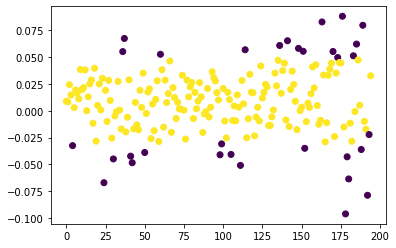

In [177]:
plt.scatter(hedge.index, hedge.values, c = isovalresult2)

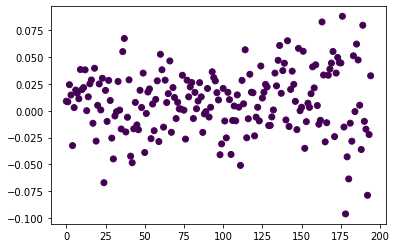

In [173]:
plt.scatter(hedge.index, hedge.values, c = score2)

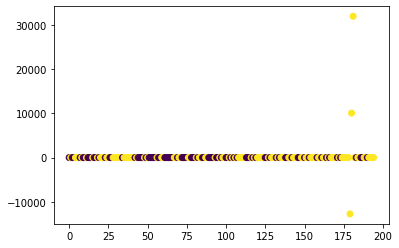

In [142]:
plt.scatter(valuevsgrowth.index, valuevsgrowth.values, c = score)

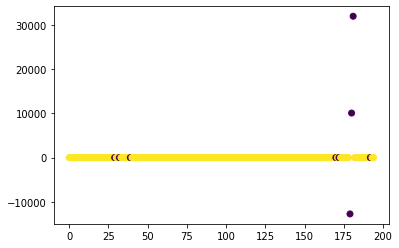

In [144]:
plt.scatter(valuevsgrowth.index, valuevsgrowth.values, c = isovalresult)